<a href="https://colab.research.google.com/github/princecj65779/Assignment-3---602/blob/main/603%20Assignment%20%20EDA%20Youtube%20Stats%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring YouTube's Trending Video and Comments Datasets**

* Exploratory Data Analysis of the 2017 Youtube Statistics from Kaggle.com

* Data is from [Kaggle](https://www.kaggle.com/datasnaek/youtube?select=UScomments.csv)

* This dataset consists of 11 features with about 7992 rows.

* Following are the features of the dataset:

### **Specifically, I'll try to answer some questions:**

1. Relationship between different categories
2. Cleaning any missing data and filling it up(if any)
3. What are the most common tags? Do they mean anything for view count?
4. Does comments and likes have any relation with respect to the view count. 

# **1.0 Libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pip install simplejson
import simplejson as json

# **1.1 Data**

In [26]:
USvideos = pd.read_csv('https://raw.githubusercontent.com/princecj65779/Assignment-3---602/main/Data/USvideos.csv',encoding='utf8',error_bad_lines = False)

JSON= pd.read_csv('https://raw.githubusercontent.com/princecj65779/Assignment-3---602/main/Data/US_category_id.json')

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [27]:
# Info about the data
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7992 non-null   object 
 1   title           7992 non-null   object 
 2   channel_title   7992 non-null   object 
 3   category_id     7992 non-null   int64  
 4   tags            7992 non-null   object 
 5   views           7992 non-null   int64  
 6   likes           7992 non-null   int64  
 7   dislikes        7992 non-null   int64  
 8   comment_total   7992 non-null   int64  
 9   thumbnail_link  7992 non-null   object 
 10  date            7992 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 686.9+ KB


There are 11 columns with 7992 rows.

In [28]:
# Info about the data
USvideos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


### **1.1.1 Missing Data**

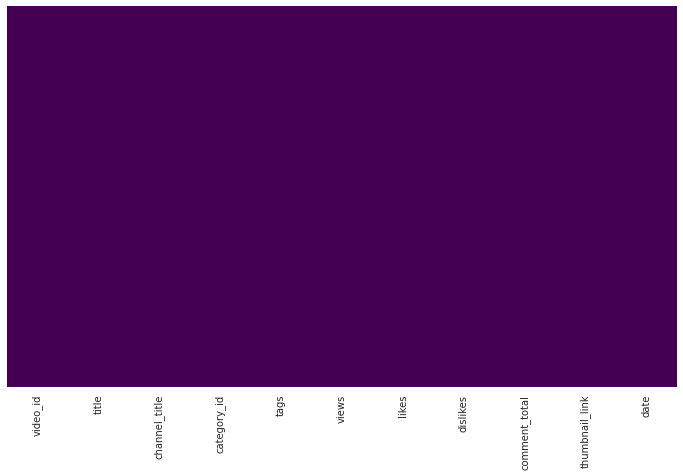

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(USvideos.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Surprisingly we see that no rows of any column has any missing data.



## **1.2 EDA**

### **1.2.1 Adding categories column**

In [30]:
with open('/content/drive/MyDrive/Colab Notebooks/archive/US_category_id.json', 'r') as file:    
    US_category_id = json.load(file)


# create a dictionary to map 'category_id' as 'category'
dic_cat = {}
for category in US_category_id['items']:
    dic_cat[category['id']] = category['snippet']['title']
dic_cat
print(dic_cat)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


Since category_id column contains a list of integers, we convert them into strings to map the categories column.



In [31]:
USvideos['category_id'] = USvideos['category_id'].astype(str)
USvideos.insert(4, 'categories', USvideos['category_id'].map(dic_cat))
USvideos.head()[['categories', 'category_id']]

,categories,category_id
0,Entertainment,24
1,Science & Technology,28
2,People & Blogs,22
3,Science & Technology,28
4,Comedy,23


Preview of the first 5 rows of the categories and the category_id column.



### **1.2.2 Correlation Matrix and Heatmap**

In [32]:
# First calculate for the correlation matrix
htmp = USvideos[['views', 'likes', 'dislikes', 'comment_total']]
htmp = htmp.corr()
htmp

,views,likes,dislikes,comment_total
views,1.000000,0.832844,0.541955,0.715557
likes,0.832844,1.000000,0.497439,0.836477
dislikes,0.541955,0.497439,1.000000,0.543983
comment_total,0.715557,0.836477,0.543983,1.000000


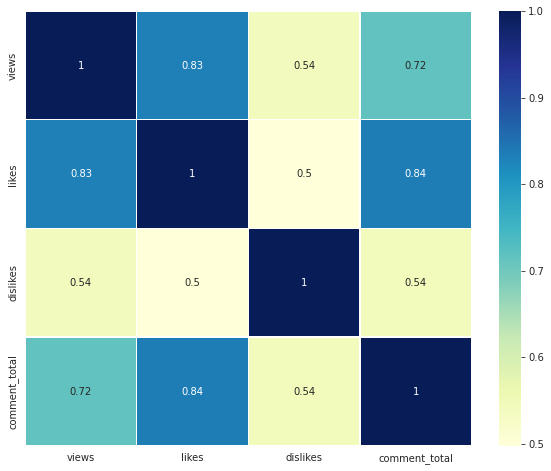

In [33]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,8))

# Plot heatmap
sns.heatmap(htmp, annot=True, linewidths=0.5, cmap="YlGnBu")
plt.show()



*   We see above that there is a positive correlation between all the columns ($0 &lt; r &lt; 1$)
*   Note that positive correlation means that when one variable increases, so does the other, or when one variable decreases, so does the other.
*   There is a strong positive correlation between likes and views ($r=0.83$), and likes and comments ($r=0.84$).
*   Lowest positive correlation exists between likes and dislikes ($r=0.5$).





### **1.2.3 Views by Categories**


In [34]:
# Group data by 'categories'
views_by_cat = USvideos.groupby('categories')
cat_list = list(views_by_cat.first().index.values)

# Loop to make a list of views per category
views = []
for category in cat_list:
    views.append(views_by_cat.get_group(category)['views'].sum()) # Add up all the views

# Make a DataFrame and sort 'views' in descending order
data = {"Categories": cat_list, "Views": views}
data = pd.DataFrame(data).sort_values(ascending=False, by='Views')
data.head(5)

,Categories,Views
3,Entertainment,1848944372
7,Music,1470692015
1,Comedy,936255337
10,People & Blogs,856891892
12,Science & Technology,473462041


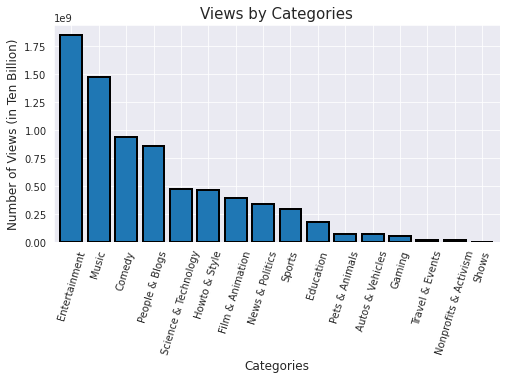

In [35]:
# Plot data
ax = data.plot.bar(x='Categories', y='Views', rot=73, edgecolor='black', 
                   linewidth=2, align='center', figsize=(8,4), width=0.8, legend=None)

# Set axis labels and title
ax.set_ylabel("Number of Views (in Ten Billion)", size=12)
ax.set_xlabel("Categories", size=12)
ax.set_title("Views by Categories", size=15)

plt.show()


*   We see that Entertainment and Music are the two categories with the most views (Both greater than seventeen billion views).

*   We see that Entertainment and Music are unusually greater than other categories, i.e. Comedy, People & Blogs, and etc...

*   Movies, Shows, Travel & Events are the categories with the lowest number of views.


### **1.2.4 Likes by Categories**

In [36]:
# Loop to make a list of likes per category
likes = []
for category in cat_list:
    likes.append(views_by_cat.get_group(category)['likes'].sum()) # Add up all the likes

# Make a DataFrame and sort 'views' in descending order
data = {"Categories": cat_list, "Likes": likes}
data = pd.DataFrame(data).sort_values(ascending=False, by='Likes')
data.head(5)

,Categories,Likes
7,Music,75774083
3,Entertainment,55261042
1,Comedy,43528592
10,People & Blogs,34603439
6,Howto & Style,25394557


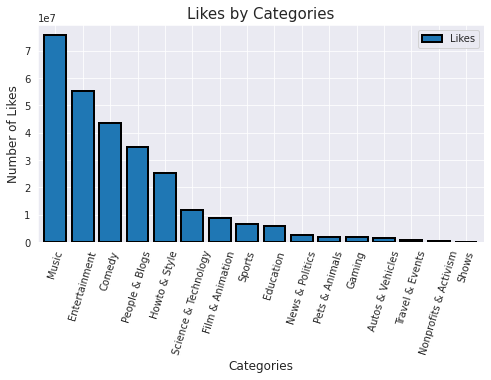

In [37]:
# Plot data
ax = data.plot.bar(x='Categories', y='Likes', rot=73, edgecolor='black', 
                   linewidth=2, align='center', figsize=(8,4), width=0.8)

# Set axis labels and title
ax.set_ylabel("Number of Likes", size=12)
ax.set_xlabel("Categories", size=12)
ax.set_title("Likes by Categories", size=15)

plt.show()



*   We see again that Entertainment and Music are the categories with the most likes.
*   However, note that this time, Music outnumbered Entertainment in terms of number of likes.
*   Again, we see that Nonprofits and Activism and Shows has the lowest likes.
   *   This result is parallel to the correlation coefficient above in the heatmap above since views and likes had relatively high value ($r=0.83$)


### **1.2.5 Dislikes by Categories**

In [38]:
# Loop to make a list of dislikes per category
dislikes = []
for category in cat_list:
    dislikes.append(views_by_cat.get_group(category)['dislikes'].sum()) # Add up all the dislikes

# Make a DataFrame and sort 'views' in descending order
data = {"Categories": cat_list, "Dislikes": dislikes}
data = pd.DataFrame(data).sort_values(ascending=False, by='Dislikes')
data.head(5)

,Categories,Dislikes
3,Entertainment,3551122
10,People & Blogs,3243878
7,Music,2760747
1,Comedy,1432895
12,Science & Technology,869399




*   We see again that Entertainment and Music had the most dislikes.

*   Again, we see that Nonprofits and Activism and Shows has the lowest dislikes.

  *   Again, we can relate this result with the heatmap above, as there was a positive correlation between views and dislikes ($r=0.54$), we see that the order in which each of the categories are aligned on the graphs are similar to that of the views and the dislikes.


### **1.2.6 Comments by Categories**

In [39]:
# Loop to make a list of likes per category
comments = []
for category in cat_list:
    comments.append(views_by_cat.get_group(category)['comment_total'].sum()) # Add up all the comments

# Make a DataFrame and sort 'views' in descending order
data = {"Categories": cat_list, "Comments": comments}
data = pd.DataFrame(data).sort_values(ascending=False, by='Comments')
data.head(5)

,Categories,Comments
7,Music,8666029
3,Entertainment,8481297
10,People & Blogs,5094321
1,Comedy,4635270
6,Howto & Style,3568904


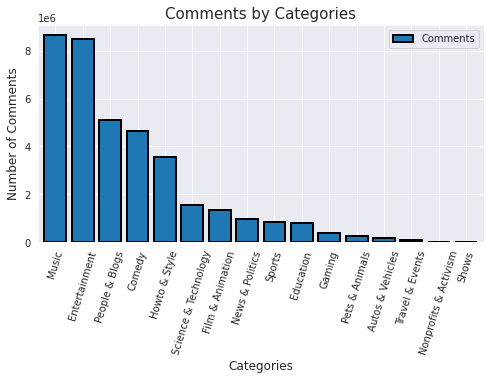

In [40]:
# Plot data
ax = data.plot.bar(x='Categories', y='Comments', rot=73, edgecolor='black', 
                   linewidth=2, align='center', figsize=(8,4), width=0.8)

# Set axis labels and title
ax.set_ylabel("Number of Comments", size=12)
ax.set_xlabel("Categories", size=12)
ax.set_title("Comments by Categories", size=15)

plt.show()

* We see again that Entertainment and Music had the most comments.
* Entertainment and Music had the most comments.
* Nonprofits and Activism and Movies had the least comments.

### **1.2.7 Pie Chart of Categories**

In [41]:
# Group data by 'categories'
cat_count = USvideos.groupby('categories')
cat_count = cat_count['categories'].count()
cat_count


categories
Autos & Vehicles          116
Comedy                    755
Education                 334
Entertainment            1601
Film & Animation          378
Gaming                     82
Howto & Style             869
Music                    1250
News & Politics           623
Nonprofits & Activism      14
People & Blogs            882
Pets & Animals            116
Science & Technology      512
Shows                       2
Sports                    410
Travel & Events            48
Name: categories, dtype: int64

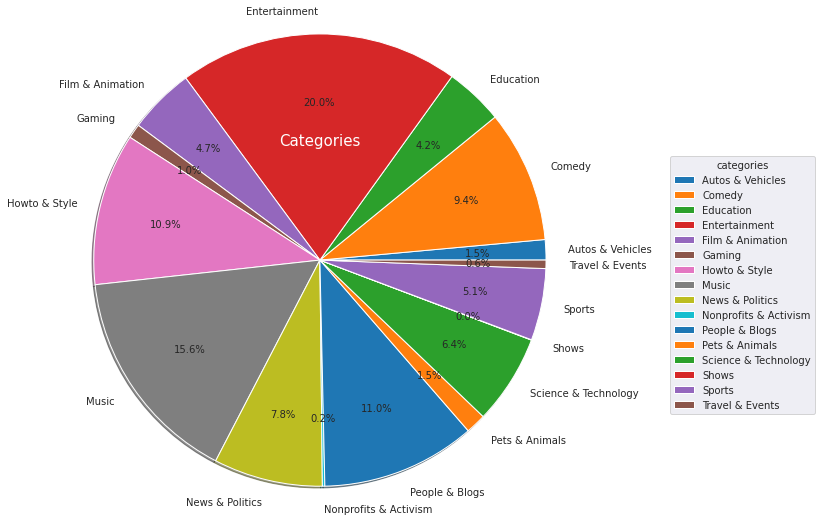

In [42]:
# Get lists of category lists and counts
# cat_list = list(cat_count.index.values)
cat_count = list(cat_count)

# Plot Pie Plot
plt.pie(cat_count, labels=cat_list, autopct='%.1f%%', pctdistance=0.7, shadow=True, radius=2.6)
plt.title("Categories", size=15, color='white')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0, 1.8, 1), title="categories")

plt.show()


* Proportion of videos in different categories.
* We see Entertainment had the biggest proprotion, close to a 3rd of all the videos ($20.0$%).


### **1.2.8 Log-Histogram of Views/Likes/Dislikes/Comments**

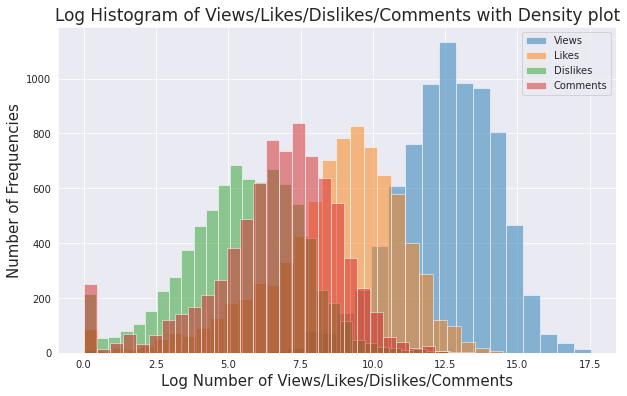

In [43]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,6))

# Set theme
sns.set_style('darkgrid')

# Plot all four histograms
plt.hist(np.log(USvideos['views']+1), bins=30,alpha=0.5)
plt.hist(np.log(USvideos['likes']+1), bins=30,alpha=0.5)
plt.hist(np.log(USvideos['dislikes']+1), bins=30,alpha=0.5)
plt.hist(np.log(USvideos['comment_total']+1), bins=30,alpha=0.5)

# Grid/Labels/Title/Legend
plt.xlabel('Log Number of Views/Likes/Dislikes/Comments', size=15)
plt.ylabel('Number of Frequencies', size=15)
plt.title('Log Histogram of Views/Likes/Dislikes/Comments with Density plot', size=17)
plt.legend(['Views','Likes','Dislikes','Comments'])

plt.show()

* Because the number of views greatly outweighs those of likes/dislikes/comments, we take the log of the number of views/likes/dislikes/comments to compare them together.
* We see that histogram of views/likes/dislikes/comments looks normal, i.e.bell-shaped curves.
* Mean value of views is the greatest, while the mean values of dislikes is the lowest.

### **1.2.9 Scatterplot Comparison of Views/Likes/Dislikes/Comments**

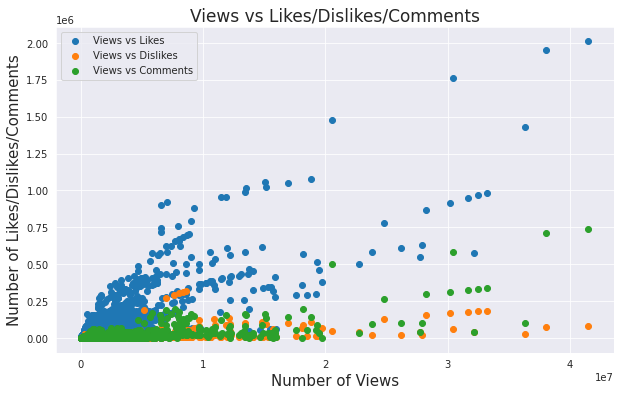

In [44]:

# Set figure size and theme
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('darkgrid')

# Plot Scatter Plots
plt.scatter(USvideos['views'], USvideos['likes'])
plt.scatter(USvideos['views'], USvideos['dislikes'])
plt.scatter(USvideos['views'], USvideos['comment_total'])

# Legend/Axis labels/Title
plt.legend(['Views vs Likes', 'Views vs Dislikes', 'Views vs Comments'])
plt.title('Views vs Likes/Dislikes/Comments', size=17)
plt.xlabel('Number of Views', size=15)
plt.ylabel('Number of Likes/Dislikes/Comments', size=15)

plt.show()

Here we created a scatterplot to see the comparison between Likes/Dislikes/Comments with respect to Views.

### **By doing the analysis above we can conclude many things from above**

* There were no missing values in this data which is somewhat rare to find.

* There is a strong positive correlation between likes and views ( r=0.83 ), and likes and comments ( r=0.84 ).

* The most viewed category of videos were also the most liked one as well.

* Funny and comedy tags were used the most which suggests that entertainment and music videos with these tags would have higher number of views.